In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression




In [4]:
saldf = pd.read_csv('/content/diabetcsv.csv')
saldf.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [5]:
saldf.isnull().sum()

,0
preg,0
plas,0
pres,0
skin,0
insu,0
mass,0
pedi,0
age,0
class,0


In [6]:
inp = saldf[['age','mass','insu','plas']]
out = saldf['class']

In [7]:
LR = LogisticRegression()
LR.fit(inp, out)

LogisticRegression()

In [8]:
age =int(input("enter age"))
mass =int(input("enter mass"))
insu =int(input("enter insu"))
plas =int(input("enter plas"))
pred=LR.predict([[age,mass,insu,plas]])
print(pred)


enter age23
enter mass59
enter insu45
enter plas89
['tested_positive']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [9]:
LR.score(inp,out)

0.7669270833333334

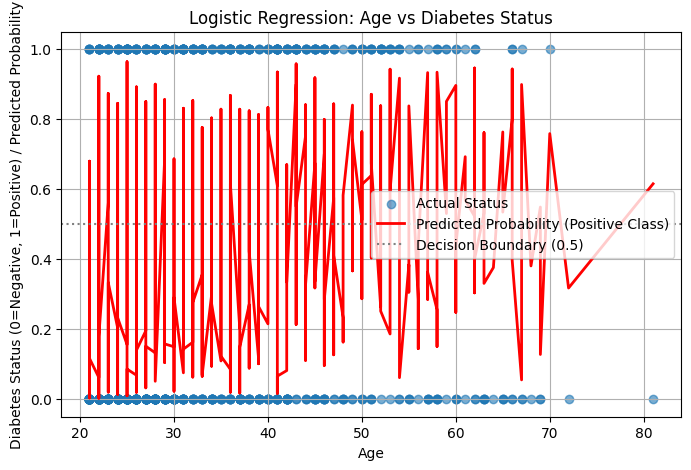

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

plt.figure(figsize=(8,5))

# Map categorical 'out' variable to numerical for plotting (0 or 1)
out_numerical = out.map({'tested_negative': 0, 'tested_positive': 1})

# Sort `inp` by 'age' to ensure the probability curve is ordered correctly
sorted_inp = inp.sort_values(by='age')

# Predict probabilities for the sorted input data (probability of the positive class)
predicted_probabilities = LR.predict_proba(sorted_inp)[:, 1]

# Scatter plot of one feature ('age') against the actual numerical outcome
plt.scatter(inp['age'], out_numerical, label='Actual Status', alpha=0.6)

# Plotting the predicted probabilities as a smooth line
plt.plot(sorted_inp['age'], predicted_probabilities, color='red', linewidth=2, label='Predicted Probability (Positive Class)')

# Add a decision boundary at 0.5
plt.axhline(y=0.5, color='gray', linestyle=':', label='Decision Boundary (0.5)')

# Update title and labels to reflect the actual data and model
plt.title("Logistic Regression: Age vs Diabetes Status")
plt.xlabel("Age")
plt.ylabel("Diabetes Status (0=Negative, 1=Positive) / Predicted Probability")
plt.legend()
plt.grid(True)
plt.show()